In [1]:
# Want to make a plot of the aggregate alpha at different scales and how it changes 
# in both serpentine and BCI on the same plot

In [2]:
# Import
import dd_functions as dd
import numpy as np
import pandas as pd
from scipy.optimize import minimize_scalar
import scipy.stats as st

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [3]:
# Read in serpentine
spd = pd.read_csv('data/Serpentine.csv',dtype='Int64')
sn0i = spd.sum().astype('Int64')
# Read in bci
bci_full = pd.read_csv('../BCI50HA/bci5.txt',sep='\t')
# Trim to only alive species with dbh>100mm
bci = bci_full.loc[(bci_full['dbh']>=100)&(bci_full['status']=='A')]

# Serpentine

In [4]:
# Create fractions
# Keep threshold at 128 everywhere
th = 128
# Divide into 2x2
inds4 = (spd.index//128*2+spd.index//8%2)
sfr4 = dd.create_f(spd.groupby(inds4).sum().T,thresh=th)
# Divide into 2x4
inds8 = (spd.index//64*2+spd.index//8%2)
sfr8 = dd.create_f(spd.groupby(inds8).sum().T,thresh=th)
# Divide into 4x4
inds16 = (spd.index//64*4+spd.index//4%4)
sfr16 = dd.create_f(spd.groupby(inds16).sum().T,thresh=th)
# Divide into 4x8
inds32 = (spd.index//32*4+spd.index//4%4)
sfr32 = dd.create_f(spd.groupby(inds32).sum().T,thresh=th)
# Divide into 8x8
inds64 = (spd.index//32*8+spd.index//2%8) # I think this is taking the nearest 4 cells and summing them together
sfr64 = dd.create_f(spd.groupby(inds64).sum().T,thresh=th)
# Divide into 8x16, so sum adjacent plots then compare.
sfr128 = dd.create_f(spd.groupby(spd.index//2).sum().T,thresh=th)
# Divide into 16x16
sfr256 = dd.create_f(spd.T,thresh=th)

In [5]:
# One bisection
sal2 = minimize_scalar(dd.loglikelihood,bounds=(0.9,1.1),method='bounded',
                args=(spd[0:128].sum().values.astype(int),sn0i))
# 2x2
sal4 = minimize_scalar(dd.loglikelihood,bounds=(0.8,1.5),method='bounded',
                args=(np.rint(sfr4['frac']*sfr4['n0']).astype(int),sfr4['n0']))
# 2x4
sal8 = minimize_scalar(dd.loglikelihood,bounds=(0.8,1.5),method='bounded',
                args=(np.rint(sfr8['frac']*sfr8['n0']).astype(int),sfr8['n0']))
# 4x4
sal16 = minimize_scalar(dd.loglikelihood,bounds=(0.8,1.5),method='bounded',
                args=(np.rint(sfr16['frac']*sfr16['n0']).astype(int),sfr16['n0']))
# 4x8
sal32 = minimize_scalar(dd.loglikelihood,bounds=(0.8,1.5),method='bounded',
                args=(np.rint(sfr32['frac']*sfr32['n0']).astype(int),sfr32['n0']))
# 8x8
sal64 = minimize_scalar(dd.loglikelihood,bounds=(0.8,1.5),method='bounded',
                args=(np.rint(sfr64['frac']*sfr64['n0']).astype(int),sfr64['n0']))
# 8x16
sal128 = minimize_scalar(dd.loglikelihood,bounds=(0.8,1.5),method='bounded',
                args=(np.rint(sfr128['frac']*sfr128['n0']).astype(int),sfr128['n0']))
# 16x16
sal256 = minimize_scalar(dd.loglikelihood,bounds=(0.8,1.5),method='bounded',
                args=(np.rint(sfr256['frac']*sfr256['n0']).astype(int),sfr256['n0']))

In [6]:
# This is old before I added in the intermediate points
#sal_x = [1.0/2,1.0/4,1.0/64,1.0/128,1.0/256]
#sal = [sal2.x,sal4.x,sal64.x,sal128.x,sal256.x]
# It's now just this again:
sal_x = [1/2**n for n in np.arange(1,9)] 
sal = [sal2.x,sal4.x,sal8.x,sal16.x,sal32.x,sal64.x,sal128.x,sal256.x]

# BCI

In [7]:
# 256
bi8 = dd.bisect(bci,1000,500,level=8)
bfr256 = dd.create_f(bi8,thresh=th)
# 128
bi7 = dd.bisect(bci,1000,500,level=7)
bfr128 = dd.create_f(bi7,thresh=th) 
# 64
bi6 = dd.bisect(bci,1000,500,level=6)
bfr64 = dd.create_f(bi6,thresh=th) 
# 32
bi5 = dd.bisect(bci,1000,500,level=5)
bfr32 = dd.create_f(bi5,thresh=th) 
# 16
bi4 = dd.bisect(bci,1000,500,level=4)
bfr16 = dd.create_f(bi4,thresh=th) 
# 8
bi3 = dd.bisect(bci,1000,500,level=3)
bfr8 = dd.create_f(bi3,thresh=th) 
# 4
bi2 = dd.bisect(bci,1000,500,level=2)
bfr4 = dd.create_f(bi2,thresh=th) 
# 2
bi1 = dd.bisect(bci,1000,500,level=1)
bfr2 = dd.create_f(bi1,thresh=th) 


In [8]:
# 2
bal2 = minimize_scalar(dd.loglikelihood,bounds=(0.9,1.3),method='bounded',
                args=(np.rint(bfr2['frac']*bfr2['n0']).astype(int),bfr2['n0']))
# 4
bal4 = minimize_scalar(dd.loglikelihood,bounds=(0.9,1.6),method='bounded',
                args=(np.rint(bfr4['frac']*bfr4['n0']).astype(int),bfr4['n0']))
# 8
bal8 = minimize_scalar(dd.loglikelihood,bounds=(0.9,1.6),method='bounded',
                args=(np.rint(bfr8['frac']*bfr8['n0']).astype(int),bfr8['n0']))
# 16
bal16 = minimize_scalar(dd.loglikelihood,bounds=(0.9,1.6),method='bounded',
                args=(np.rint(bfr16['frac']*bfr16['n0']).astype(int),bfr16['n0']))
# 32
bal32 = minimize_scalar(dd.loglikelihood,bounds=(0.9,1.6),method='bounded',
                args=(np.rint(bfr32['frac']*bfr32['n0']).astype(int),bfr32['n0']))
# 64
bal64 = minimize_scalar(dd.loglikelihood,bounds=(0.9,1.6),method='bounded',
                args=(np.rint(bfr64['frac']*bfr64['n0']).astype(int),bfr64['n0']))
# 128
bal128 = minimize_scalar(dd.loglikelihood,bounds=(0.9,1.6),method='bounded',
                args=(np.rint(bfr128['frac']*bfr128['n0']).astype(int),bfr128['n0']))
# 256
bal256 = minimize_scalar(dd.loglikelihood,bounds=(0.9,1.6),method='bounded',
                args=(np.rint(bfr256['frac']*bfr256['n0']).astype(int),bfr256['n0']))

In [9]:
bal_x = [1/2**n for n in np.arange(1,9)] 
bal = [bal2.x,bal4.x,bal8.x,bal16.x,bal32.x,bal64.x,bal128.x,bal256.x]

# Plot time!

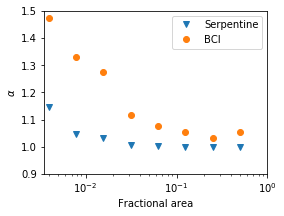

In [10]:
fig,ax = plt.subplots(figsize=(4,3))
ax.semilogx(sal_x,sal,'v',label='Serpentine')
ax.semilogx(bal_x,bal,'o',label='BCI')
ax.set_xlabel('Fractional area')
ax.set_ylabel(r'$\alpha$')
ax.set_ylim(0.9,1.5)
ax.set_xlim(0.0035,1)
plt.legend()
plt.savefig('AlphaScaling_SerpentineBCI.pdf',bbox_inches='tight')
plt.savefig('Manuscript/AlphaScaling_SerpentineBCI.eps',format='eps',bbox_inches='tight')
plt.savefig('Manuscript/AlphaScaling_SerpentineBCI.pdf',format='pdf',bbox_inches='tight')
plt.show()

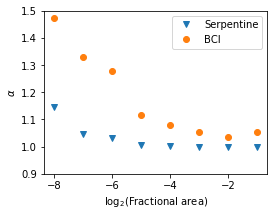

In [12]:
# Make an alternative one with different x axis
fig,ax = plt.subplots(figsize=(4,3))
alts_x = np.log2(sal_x)
altb_x = np.log2(bal_x)
ax.plot(alts_x,sal,'v',label='Serpentine')
ax.plot(altb_x,bal,'o',label='BCI')
ax.set_xlabel(r'$\log_2($Fractional area)')
ax.set_ylabel(r'$\alpha$')
ax.set_ylim(0.9,1.5)
#ax.set_xlim(0.0035,1)
plt.legend()
plt.savefig('AlphaScaling_SerpentineBCI_altx.pdf',bbox_inches='tight')
plt.savefig('Manuscript/AlphaScaling_SerpentineBCI_altx.eps',format='eps',bbox_inches='tight')
plt.savefig('Manuscript/AlphaScaling_SerpentineBCI_altx.pdf',format='pdf',bbox_inches='tight')
plt.show()